In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn_pandas import DataFrameMapper
import sklearn
import math


data = pd.read_csv('facebook_train.csv', sep=",", header=None)
data.columns = ["total_followers", "type", "category", "month","weekday", "hour", "paid", "comment", "like", "share" ]
df = pd.DataFrame(data, columns=data.columns)
df = df.drop(df.index[0])
y_train  = df["like"]
df.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share
1,124050,Photo,3,6,4,17,1,3,77,16
2,132556,Photo,2,8,3,24,0,11,313,50
3,92786,Photo,2,2,6,17,1,2,145,39
4,135632,Photo,1,9,2,1,0,2,299,49
5,139540,Link,1,12,3,17,1,7,229,21


In [92]:
y_train = y_train.as_matrix().astype(np.float32)
print y_train[0:4]
y_train = [math.log(i+0.000001) for i in y_train]
y_train[0:4]


[  77.  313.  145.  299.]


[4.3438054348406965, 5.746203193735042, 4.976733749317126, 5.700443576735168]

In [93]:
mapper = DataFrameMapper([
     (['total_followers'], sklearn.preprocessing.StandardScaler()),
     (['month'], sklearn.preprocessing.LabelBinarizer()),
     (['weekday'], sklearn.preprocessing.LabelBinarizer()),
     (['hour' ], sklearn.preprocessing.StandardScaler()),
     ('type', sklearn.preprocessing.LabelBinarizer()),
     ('paid', sklearn.preprocessing.StandardScaler()),   
     ('category', sklearn.preprocessing.LabelBinarizer())   
     ])


np.round(mapper.fit_transform(df.copy()), 2)
mapper.transformed_names_

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


['total_followers',
 'month_1',
 'month_10',
 'month_11',
 'month_12',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weekday_7',
 'hour',
 'type_Link',
 'type_Photo',
 'type_Status',
 'type_Video',
 'paid',
 'category_1',
 'category_2',
 'category_3']

In [94]:
X_train = np.round(mapper.transform(df), 2)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [96]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Performance on training set

In [112]:
## Training error
pred_y_train = model.predict(X_train)

print "MSE: ",sklearn.metrics.mean_squared_error(y_train, pred_y_train)
print "Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(y_train, pred_y_train)
print "Median Absolute Error: ", sklearn.metrics.median_absolute_error(y_train, pred_y_train)

MSE:  0.877348379864
Mean Absolute Error:  0.460250744996
Median Absolute Error:  0.25267264324


In [99]:
pred_y_train[0:5]

array([ 4.46991625,  5.3797021 ,  5.07921784,  5.19847466,  4.9730924 ])

In [100]:
y_train[0:5]

[4.3438054348406965,
 5.746203193735042,
 4.976733749317126,
 5.700443576735168,
 5.433722007921052]

## Performance on test set

In [101]:
test = pd.read_csv('facebook_test.csv', sep=",", header=None)
test.columns = ["total_followers", "type", "category", "month","weekday", "hour", "paid", "comment", "like", "share" ]
testdf = pd.DataFrame(data, columns=data.columns)
testdf = df.drop(df.index[0])
y_test  = df["like"]
#take out what we don't want to use as predictors

testdf.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share
2,132556,Photo,2,8,3,24,0,11,313,50
3,92786,Photo,2,2,6,17,1,2,145,39
4,135632,Photo,1,9,2,1,0,2,299,49
5,139540,Link,1,12,3,17,1,7,229,21
6,138969,Photo,3,12,5,17,1,3,284,31


In [102]:
X_test = np.round(mapper.transform(testdf), 2)
y_test  = testdf["like"]
y_test = y_test.as_matrix().astype(np.float32)
y_test = [math.log(i+0.000001) for i in y_test]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [111]:
pred_test =  model.predict(X_test)
print "MSE: ",sklearn.metrics.mean_squared_error(y_test, pred_test)
print "Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(y_test, pred_test)
print "Median Absolute Error: ", sklearn.metrics.median_absolute_error(y_test, pred_test)

MSE:  0.87952374462
Mean Absolute Error:  0.46109453271
Median Absolute Error:  0.252889349423


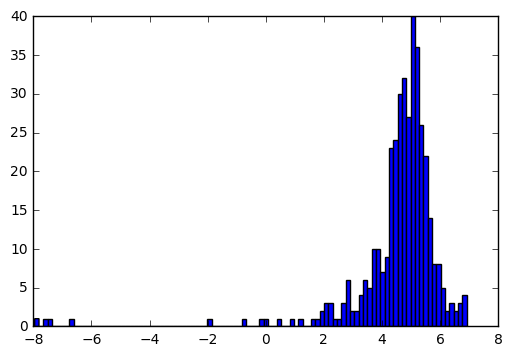

In [106]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(pred_test, bins=100)
plt.show()

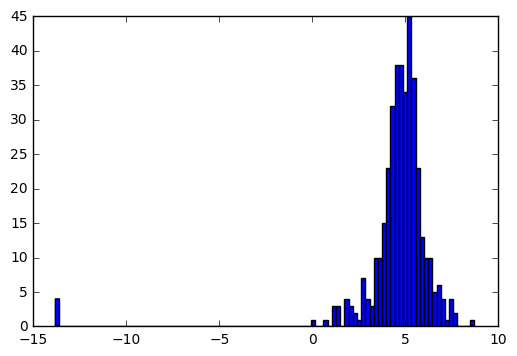

In [107]:
plt.hist(y_test,bins=100)
plt.show()